# **AI in Healthcare: Disease Diagnosis and Prediction**

- Pima Indians Diabetes 
- Heart-Disease

---

## A. **Pima Indians Diabetes**

### 1. **Problem Introduction**


Diabetes is a chronic disease that affects millions globally and can lead to severe complications if not detected and managed early. The objective of this project is to develop a machine learning model that can accurately predict the likelihood of a patient having diabetes based on diagnostic measurements.

The Pima Indians Diabetes dataset consists of medical records of female patients of Pima Indian heritage aged 21 and above. Each record includes attributes such as the number of pregnancies, BMI, insulin level, age, glucose level, blood pressure, and a binary outcome indicating whether the patient has diabetes.

🎯 **Goal**:

To build a predictive model that can classify whether a patient is likely to have diabetes (1) or not (0) based on input features.

🔢 **Dataset Summary**:

- Source: UCI Machine Learning Repository

- Total Records: 768

- Features (Independent Variables):

    - Number of Pregnancies

    - Glucose Level

    - Blood Pressure

    - Skin Thickness

    - Insulin

    - Body Mass Index (BMI)

    - Diabetes Pedigree Function

    - Age

- Target Variable:

    - Outcome (0 = Non-diabetic, 1 = Diabetic)

### 2. **Libraries**

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### 3. **Load and Understand the Dataset**

In [2]:
data = pd.read_csv('Dataset/pima-indians-diabetes.csv')
data = pd.DataFrame(data)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
# First 5 rows of the dataset
print("First 5 rows of the dataset:\n", data.head())

First 5 rows of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Shape of dataset
print("Shape of dataset:", data.shape)

# Check for missing values
print("Missing values in dataset:\n", data.isnull().sum())


Shape of dataset: (768, 9)
Missing values in dataset:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Summary statistics
print("Summary statistics:\n", data.describe())

Summary statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [6]:
# Summary information
print("Dataset information:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Dataset information:
 None


### 4. **Data Exploration and Visualization (EDA)**

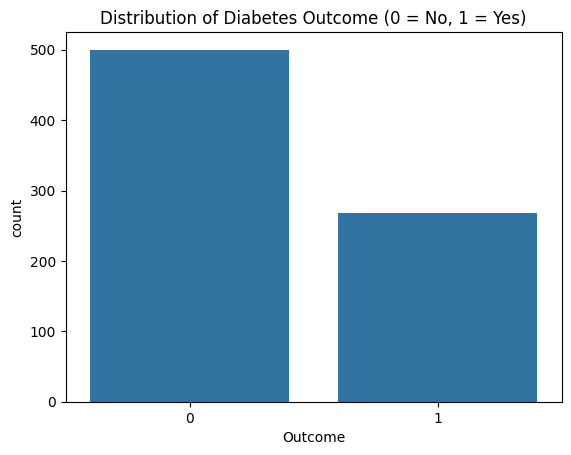

Outcome
0    500
1    268
Name: count, dtype: int64


In [7]:
# Understand Class Distribution (Imbalance Check)

# Target distribution
sns.countplot(data=data, x='Outcome')
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()

# Numerical count
print(data['Outcome'].value_counts())

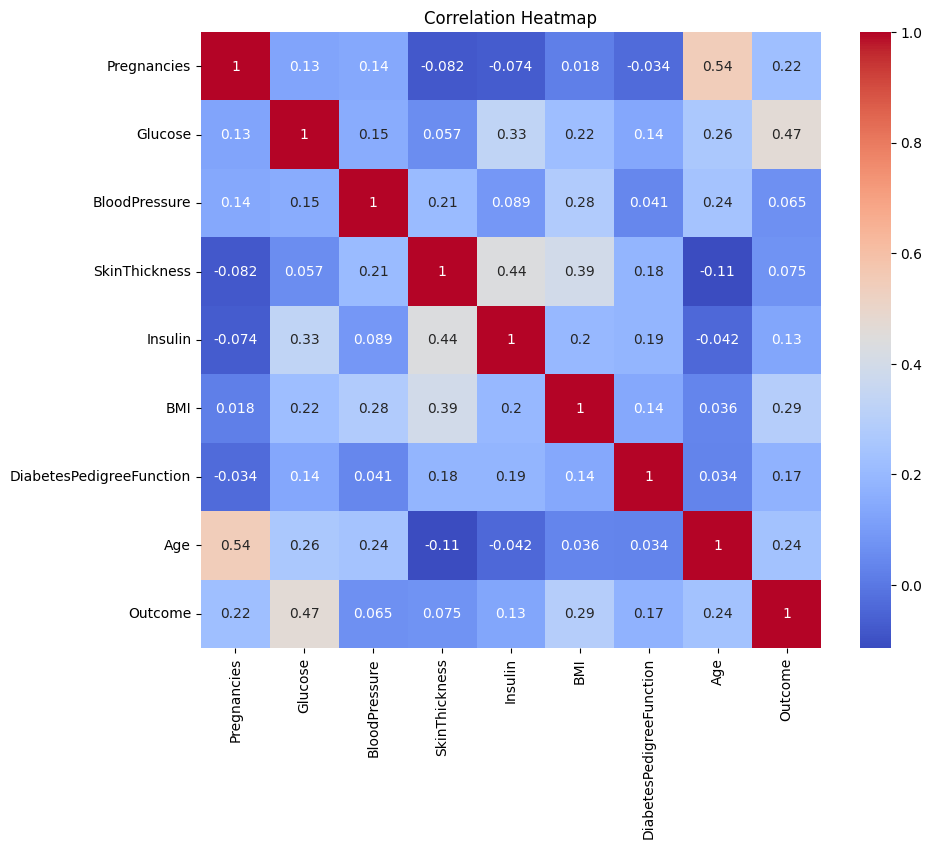

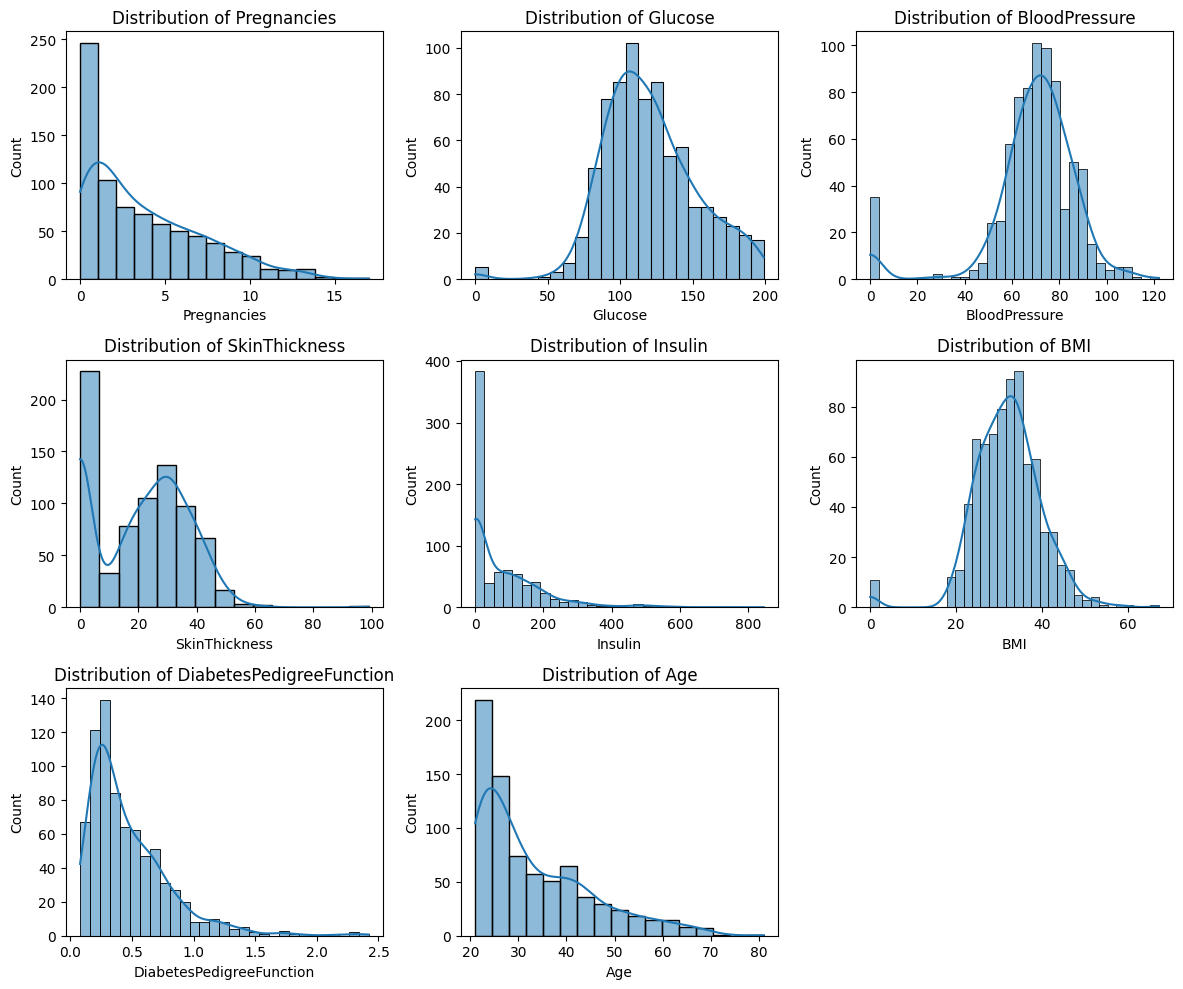

In [8]:
# Correlation and Feature Insights

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Feature distribution
plt.figure(figsize=(12, 10))
for column in data.columns[:-1]:  # Exclude the target variable
    plt.subplot(3, 3, data.columns.get_loc(column) + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

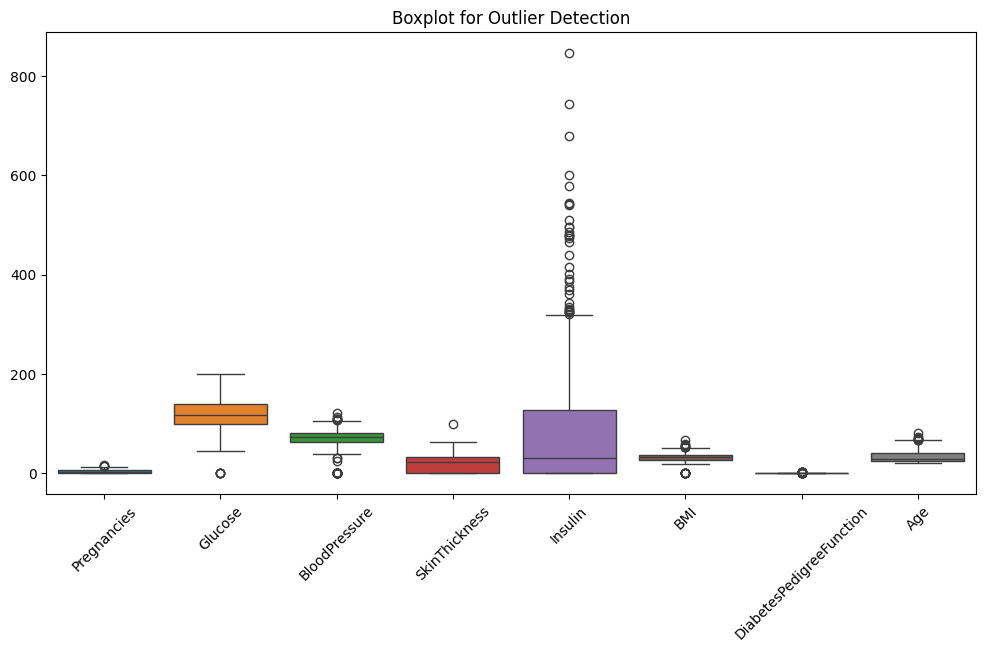

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns='Outcome'))  # Exclude the target variable for boxplot
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


### 5. **Data Preprocessing**

In [10]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

print("Training distribution:\n", y_train.value_counts())
print("Test distribution:\n", y_test.value_counts())

Training set shape: (614, 8)
Test set shape: (154, 8)
Training distribution:
 Outcome
0    401
1    213
Name: count, dtype: int64
Test distribution:
 Outcome
0    99
1    55
Name: count, dtype: int64


### 6. **Train Model**

#### Model 1 : Logistic Regression

In [12]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred1 = model1.predict(X_test)

In [14]:
print("Model Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

Model Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



#### Model 2 : Random Forest Classifier

In [15]:
model2 = RandomForestClassifier(n_estimators=200, class_weight= "balanced",random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [16]:
y_pred2 = model2.predict(X_test)

In [17]:
print("Model Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Model Accuracy: 0.7467532467532467
Confusion Matrix:
 [[81 18]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



#### Model 3 : XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model3 = XGBClassifier(scale_pos_weight=ratio_of_negatives_to_positives, use_label_encoder=False, eval_metric='logloss')
model3.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [23]:
y_pred3 = model3.predict(X_test)

NameError: name 'model3' is not defined

In [22]:
print("Model Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))

NameError: name 'y_pred3' is not defined

#### Model 4 : Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC
model4 = SVC(probability=True, class_weight='balanced')
model4.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [25]:
y_pred4 = model4.predict(X_test)

In [26]:
print("Model Accuracy:", accuracy_score(y_test, y_pred4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print("Classification Report:\n", classification_report(y_test, y_pred4))

Model Accuracy: 0.7077922077922078
Confusion Matrix:
 [[69 30]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75        99
           1       0.57      0.73      0.64        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



#### Model 5 : K-Nearest Neighbors (KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred5 = model5.predict(X_test)

In [29]:
print("Model Accuracy:", accuracy_score(y_test, y_pred5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred5))
print("Classification Report:\n", classification_report(y_test, y_pred5))

Model Accuracy: 0.6623376623376623
Confusion Matrix:
 [[70 29]
 [23 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



#### Model 6 : Gradient Boosting Classifier (Sklearn / LightGBM / CatBoost)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)
model6.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [31]:
y_pred6 = model6.predict(X_test)

In [32]:
print("Model Accuracy:", accuracy_score(y_test, y_pred6))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred6))
print("Classification Report:\n", classification_report(y_test, y_pred6))

Model Accuracy: 0.7337662337662337
Confusion Matrix:
 [[75 24]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



### 7. **Evaluate the Model**

In [ ]:
# models = {
#     "Logistic Regression": LogisticRegression(class_weight='balanced'),
#     "Random Forest": RandomForestClassifier(class_weight='balanced'),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     "SVM": SVC(probability=True, class_weight='balanced'),
#     "KNN": KNeighborsClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier()
# }

models = {
    "Logistic Regression": model1,
    "Random Forest": model2,
    "SVM": model4,
    "KNN": model5,
    "Gradient Boosting": model6
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    
    print(f"{name} - Accuracy: {acc:.3f}, F1: {f1:.3f}, AUC: {auc}")


Logistic Regression - Accuracy: 0.747, F1: 0.655, AUC: 0.8128558310376492
Random Forest - Accuracy: 0.747, F1: 0.636, AUC: 0.8128558310376491
SVM - Accuracy: 0.708, F1: 0.640, AUC: 0.7970615243342516
KNN - Accuracy: 0.662, F1: 0.552, AUC: 0.7201101928374656
Gradient Boosting - Accuracy: 0.734, F1: 0.650, AUC: 0.8003673094582185


### 8. **Summary of Model Performance**
| Model                            | Accuracy  | F1 Score  | ROC-AUC Score | Key Notes                                             |
| -------------------------------- | --------- | --------- | ------------- | ----------------------------------------------------- |
| **Logistic Regression**          | **0.747** | **0.655** | **0.813** ✅   | Best overall balance of metrics, simple & explainable., ✅ Highest F1 + AUC  |
| **Random Forest**                | **0.747** | 0.636     | 0.813         | Same accuracy as Logistic, slightly lower F1          |
| **Gradient Boosting**            | 0.734     | 0.650     | 0.800         | Competitive, good F1, slight drop in AUC              |
| **Support Vector Machine (SVM)** | 0.708     | 0.640     | 0.797         | Lower overall performance, slower to train            |
| **K-Nearest Neighbors (KNN)**    | 0.662     | 0.552     | 0.720         | Underperforms, sensitive to scaling and outliers ❌    |




### 9. 🔍 Interpretation

- Logistic Regression is:

    ✅ Most balanced model

    ✅ Best F1 score (handles class 1 well)

    ✅ Best ROC-AUC (discrimination power)

- Random Forest is solid but has slightly lower F1 — indicating it's predicting class 1 less confidently.

- KNN and SVM underperform — skip

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a robust and explainable pipeline
log_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Ensures all features are normalized
    ("clf", LogisticRegression(
        max_iter=2000,
        solver='lbfgs',
        class_weight='balanced',
        random_state=42,         # for reproducibility
        penalty='l2',            # default regularization
        C=1.0                    # can tune if needed
    ))
])

# Fit the model
log_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    random_state=42))])

Accuracy        : 0.695
Precision (1)   : 0.557
Recall    (1)   : 0.709
F1‑score  (1)   : 0.624
ROC‑AUC         : 0.813

Confusion Matrix:
[[68 31]
 [16 39]] 

Classification Report:
              precision    recall  f1-score   support

           0      0.810     0.687     0.743        99
           1      0.557     0.709     0.624        55

    accuracy                          0.695       154
   macro avg      0.683     0.698     0.684       154
weighted avg      0.719     0.695     0.701       154



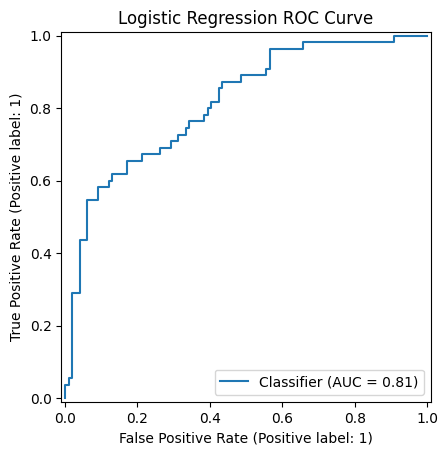

In [40]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, RocCurveDisplay)
import matplotlib.pyplot as plt

# ── 1️⃣  Make predictions
y_pred  = log_pipeline.predict(X_test)
y_proba = log_pipeline.predict_proba(X_test)[:, 1]

# ── 2️⃣  Compute metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)
cm   = confusion_matrix(y_test, y_pred)

# ── 3️⃣  Display results
print(f"Accuracy        : {acc:.3f}")
print(f"Precision (1)   : {prec:.3f}")
print(f"Recall    (1)   : {rec:.3f}")
print(f"F1‑score  (1)   : {f1:.3f}")
print(f"ROC‑AUC         : {auc:.3f}\n")

print("Confusion Matrix:")
print(cm, "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

# ── 4️⃣  Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Logistic Regression ROC Curve")
plt.show()


In [41]:
from sklearn.model_selection import cross_val_score
cv_auc = cross_val_score(log_pipeline, X, y, cv=5, scoring="roc_auc").mean()
print("5‑fold CV ROC‑AUC:", cv_auc)


5‑fold CV ROC‑AUC: 0.8322487770789657


In [42]:
import joblib
joblib.dump(log_pipeline, "best_diabetes_logreg_model.pkl")

['best_diabetes_logreg_model.pkl']

In [ ]:
# # Feature Importance
# importance = model.coef_[0]
# feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# print("Feature Importance:\n", feature_importance.sort_values(by='Importance', ascending=False))

### 10. **Inference: Predict New Patient**

In [43]:
new_data = pd.DataFrame([{
    'Pregnancies': 2,
    'Glucose': 140,
    'BloodPressure': 70,
    'SkinThickness': 30,
    'Insulin': 120,
    'BMI': 32.0,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 35
}])


model = joblib.load('best_diabetes_logreg_model.pkl')
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)[0][1]

result = "Diabetic" if prediction[0] == 1 else "Not Diabetic"
print(f"Prediction: {result} (Confidence: {probability:.2f})")


Prediction: Diabetic (Confidence: 0.58)


---

## B. **Heart Disease (UCI)**